In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def gaussian(x, μ, σ):
    return 1/np.sqrt(2*np.pi*σ**2) * np.exp(-(x-μ)**2/(2*σ**2))

In [3]:
def generate_traces(trace_length, amplitude, ratio, sigma, nr_traces):
    x = np.arange(trace_length)
    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()
    d_open = np.array([trace_open + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
    d_closed = np.array([trace_closed + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )
    return x, d_closed, d_open

In [4]:
nr_traces = 2000
trace_length = 2000
ratio = 3.5
sigma = np.sqrt(2)
amp = 1/(1/np.sqrt(2*np.pi*200**2)) 
offset = 32

In [5]:
x, d_closed, d_open = generate_traces(trace_length, amp, ratio, sigma, nr_traces)

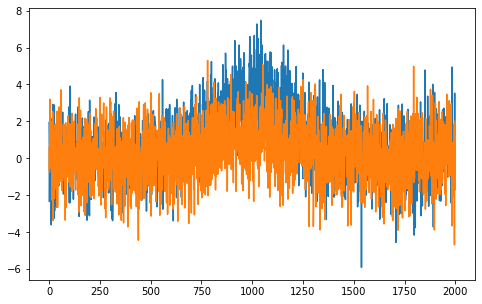

In [6]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, d_open[0,:])
ax.plot(x, d_closed[0,:])

In [7]:
def lowpass_data(data, freq, sampling_freq, order = 10):
    sos = signal.butter(order, freq, 'lp', fs=sampling_freq, output='sos')
    return signal.sosfilt(sos, data)

In [8]:
# add offset after lowpas to prevent spike at start of trace
lowpass_open = lowpass_data(d_open, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(d_closed, 10e3, 100e3, order = 1) + offset

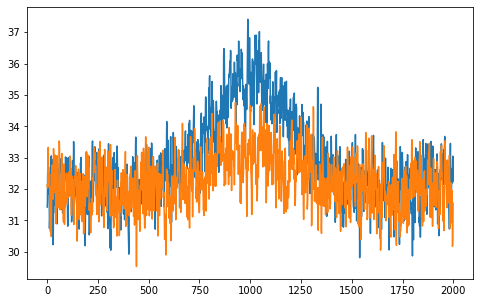

In [9]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(x, lowpass_open[0,:])
ax.plot(x, lowpass_closed[0,:])

## Now analyzing ratios

In [10]:
# mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

In [11]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.5620469301510913

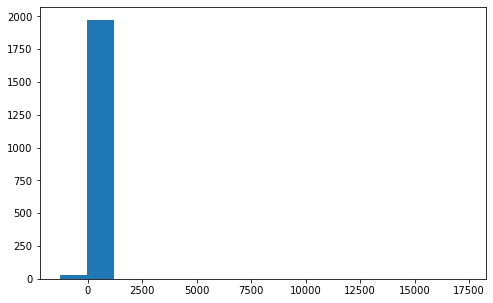

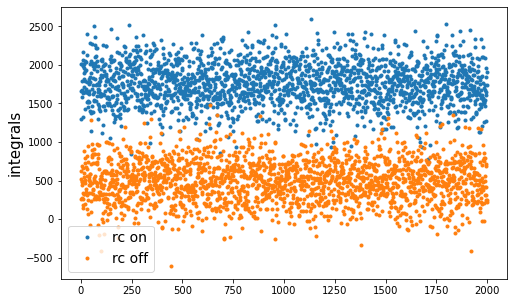

In [12]:
integrals_open = np.trapz(lowpass_open, axis = 1)
integrals_closed = np.trapz(lowpass_closed, axis = 1)
ratios = integrals_open/integrals_closed
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratios, bins = 15);

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(integrals_open, '.', label = 'rc on')
ax.plot(integrals_closed, '.', label = 'rc off')
ax.legend(fontsize = 14)
ax.set_ylabel('integrals', fontsize = 15);

We don't just see normal noise on the signal, we also have noise on the amplitudes (signal size)

In [13]:
def generate_amp_noise_array(nr_traces, sigma):
    amp_noise = []
    for _ in range(nr_traces):
        while True:
            an = 1+np.random.randn(1)*sigma
            if an >= 0:
                amp_noise.append(an[0])
                break
    return np.array(amp_noise)

def generate_amp_noise(sigma):
    while True:
        an = 1+np.random.randn(1)[0]*sigma
        if an >= 0:
            return an

In [14]:
sigma = 2
amplitude = amp
σamplitude = 1
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

do = np.array([trace_open * generate_amp_noise(σamplitude) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * generate_amp_noise(σamplitude)+ np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset

# # mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

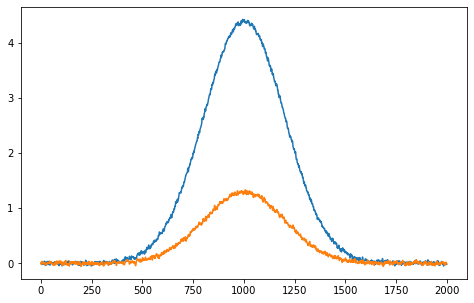

In [15]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

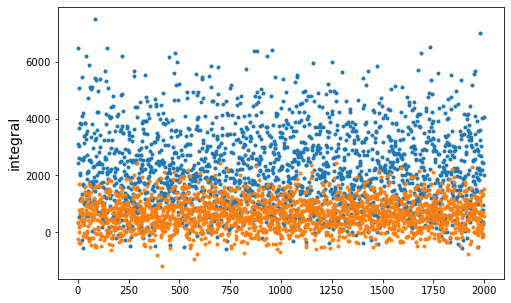

In [16]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')
ax.set_ylabel('integral', fontsize = 14);

In [17]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.403197577177953

In [18]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.403197577177953

-12.53217767655215

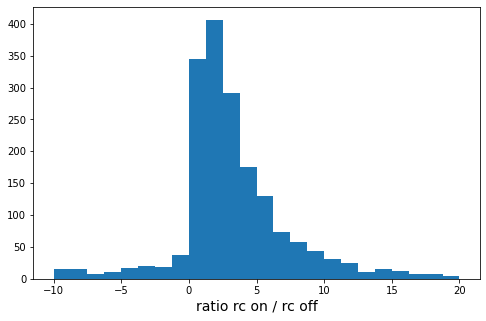

In [19]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-10,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

now allow negative amp noise

In [20]:
sigma = 3
amplitude = amp
σamplitude = 1
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

do = np.array([trace_open * (1+np.random.randn(1)[0]*σamplitude) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * (1+np.random.randn(1)[0]*σamplitude)+ np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

# mean subtract
lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

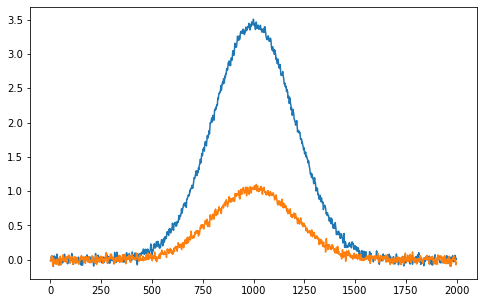

In [21]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

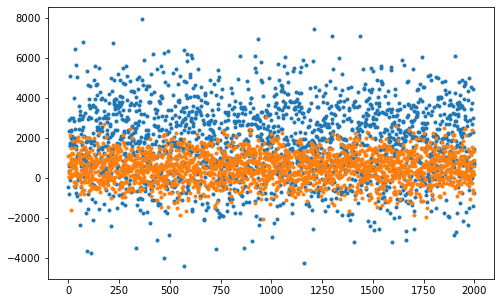

In [22]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [23]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.3229995163037933

In [24]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.3229995163037924

4.0434639028501

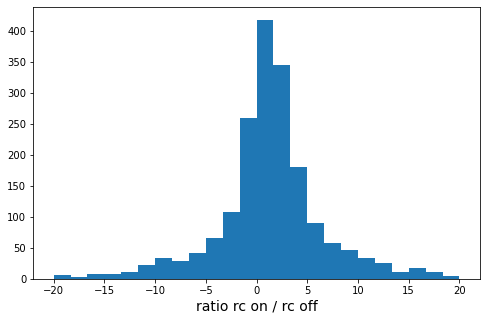

In [25]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [26]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

3.8445928226821984

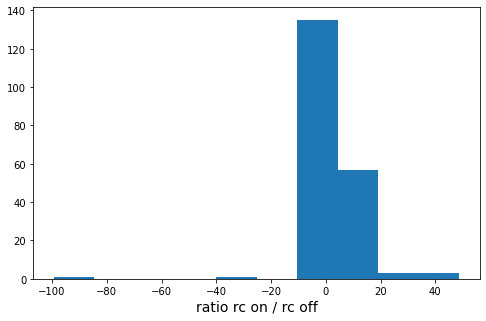

In [27]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

Text(0.5, 0, 'x [σ]')

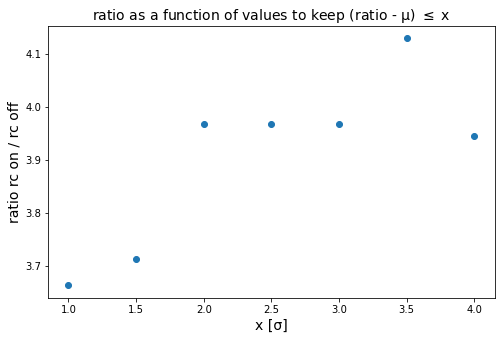

In [28]:
std_ranges = np.arange(1,4.25,0.5)
ratio_mean = []
for sr in std_ranges:
    ratios_mask = np.abs(ratios - ratios.mean()) <= sr*ratios.std()
    ratio_mean.append(ratios[ratios_mask].mean())

fig, ax = plt.subplots(figsize = (8,5))
ax.plot(std_ranges, ratio_mean, '.', ms = 12)
ax.set_title(f'ratio as a function of values to keep (ratio - μ) $\leq$ x', fontsize = 14)
ax.set_ylabel('ratio rc on / rc off', fontsize = 14)
ax.set_xlabel(f'x [σ]', fontsize = 14)

In [29]:
def random_walk_lowbound(lowbound, nr_steps):
    step_set = [-1,0,1]
    
    steps = [np.random.choice(step_set)]
    counter = 0
    while True:
        step = np.random.choice(step_set)
        if steps[counter]+step >= lowbound:
            steps.append(steps[counter]+step)
            counter += 1
        if nr_steps == counter:
            break
    return np.array(steps)

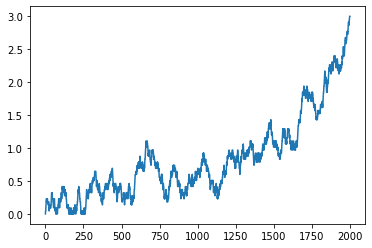

In [30]:
amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3
plt.plot(amp_walk)

In [31]:
sigma = 3
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * amp_walk[_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * amp_walk[_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

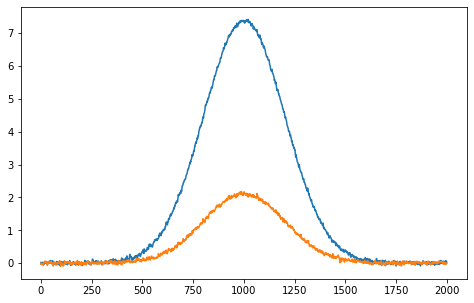

In [32]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

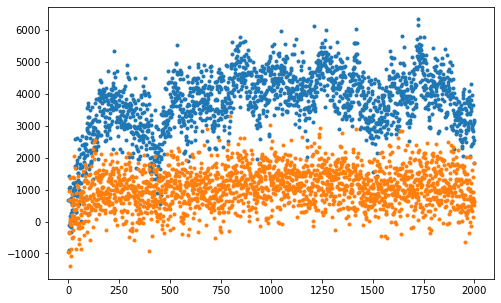

In [33]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [34]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.494955497479188

In [35]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.4949554974791877

12.099067744767192

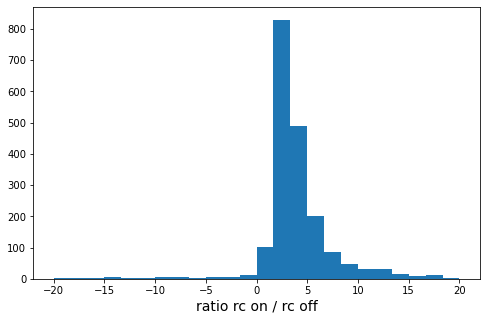

In [36]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [37]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

3.580901159899505

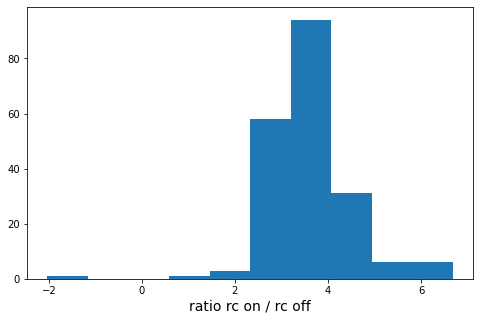

In [38]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

random walk around an offset of 1, e.g. normal amplitude

In [39]:
sigma = 20
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

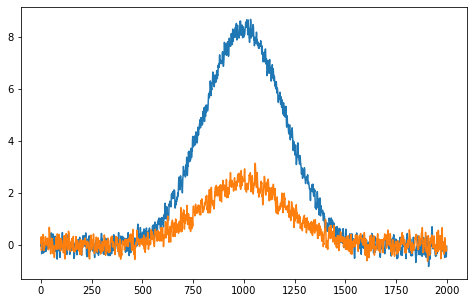

In [40]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

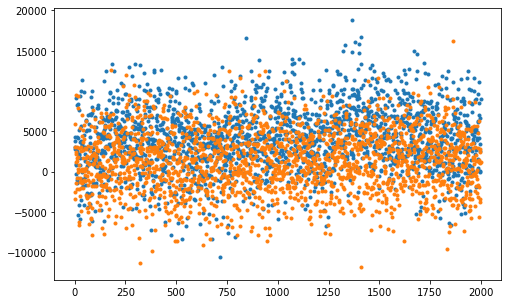

In [41]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [42]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.152903944446548

In [43]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.152903944446548

0.3492870694627964

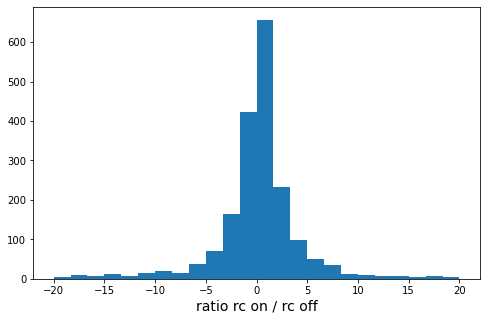

In [44]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [45]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

26.31264682822648

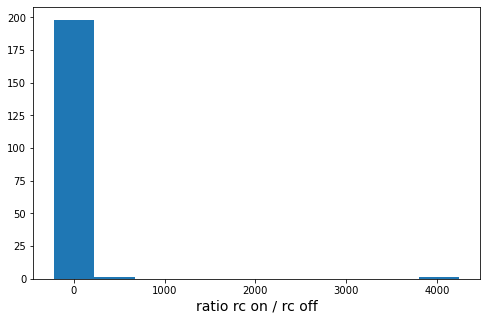

In [46]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

random walk around an offset, but different random walks for rc on and rc off

In [47]:
μma = 20
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])


amp_walk = random_walk_lowbound(0, nr_traces)
amp_walk = amp_walk/amp_walk.max()
amp_walk *= 3

dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

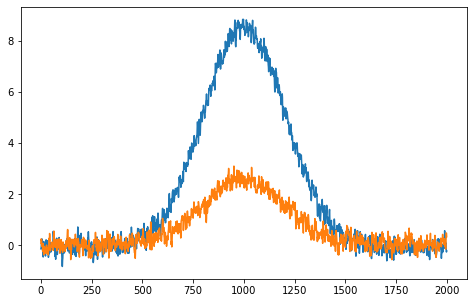

In [48]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

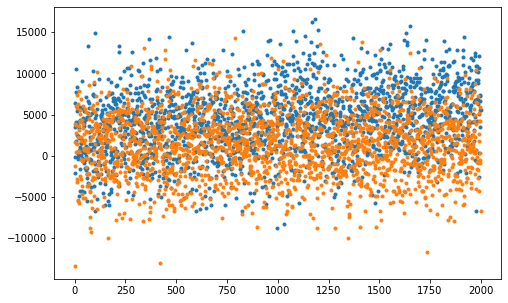

In [49]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

In [50]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)
np.mean(integral_open)/np.mean(integral_closed)

3.1006673243746725

In [51]:
np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

3.100667324374672

0.5153913140766873

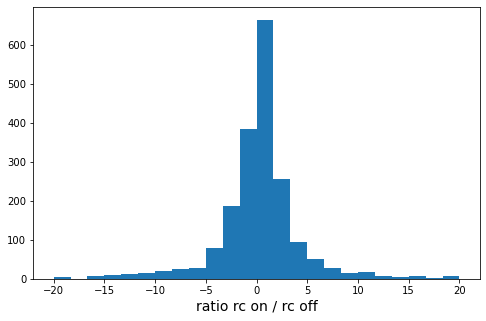

In [52]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [53]:
navg = 10
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

4.674217088580174

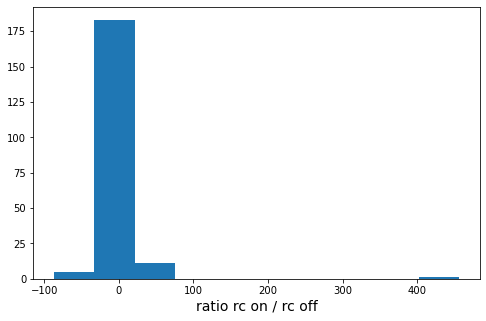

In [54]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

repeat a couple of times

In [55]:
from tqdm import tqdm
navg = 100
nr_traces = 2000
res = []
for _ in tqdm(range(100)):
    sigma = 1
    amplitude = amp
    x = np.arange(trace_length)

    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()

    amp_walk = random_walk_lowbound(0, nr_traces)
    amp_walk = amp_walk/amp_walk.max()
    amp_walk *= 2

    do = np.array([trace_open * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])


    amp_walk = random_walk_lowbound(0, nr_traces)
    amp_walk = amp_walk/amp_walk.max()
    amp_walk *= 1

    dc = np.array([trace_closed * (1+amp_walk[_]) + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

    lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
    lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset
    
    lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
    lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

    integral_open = np.trapz(lowpass_open, axis = 1)
    integral_closed = np.trapz(lowpass_closed, axis = 1)
    

    averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
    averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
    avg_ints_open = np.trapz(averaged_open, axis = 1)
    avg_ints_closed = np.trapz(averaged_closed, axis = 1)
    ratios = avg_ints_open/avg_ints_closed
    
    res.append((np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0)), 
                np.mean(integral_open)/np.mean(integral_closed),
                np.mean(ratios)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:48<00:00,  2.08it/s]


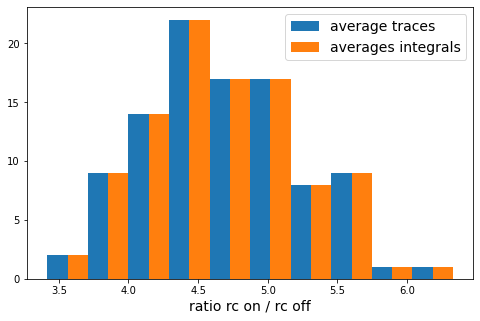

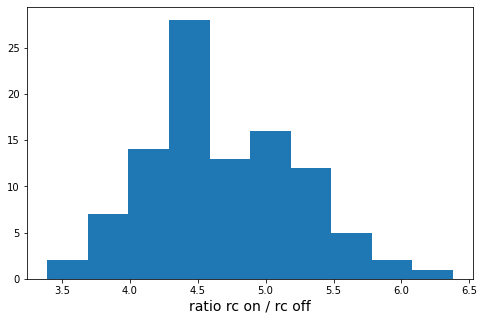

In [56]:
ratio_alltrace, ratio_integralmean, ratio_bunched = zip(*res)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_alltrace, rwidth = 0.5, align = 'mid', label = 'average traces')
ax.hist(ratio_integralmean, rwidth = 0.5, align = 'right', label = 'averages integrals')

ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ax.legend(fontsize = 14)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_bunched)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14);

same random walk for rc on and rc off, alternate between rc on and off to get a more realistic progresssion of the amplitudes, and have an upper bound in the random walk

In [57]:
def random_walk_bound(step, lowbound, highbound, nr_steps):
    step_set = np.array([-1,0,1])*step
    
    steps = [np.random.choice(step_set)]
    counter = 0
    while True:
        step = np.random.choice(step_set)
        if (steps[counter]+step >= lowbound) & (steps[counter]+step <= highbound):
            steps.append(steps[counter]+step)
            counter += 1
        if nr_steps == counter:
            break
    return np.array(steps)

In [58]:
nr_traces = 2000
sigma = np.sqrt(2)
amplitude = amp
x = np.arange(trace_length)

trace_closed = gaussian(x, 1000, 200)*amplitude
trace_open = ratio*trace_closed.copy()

amp_walk = random_walk_bound(0.05, 0, 2, nr_traces*2)
amp_walk = amp_walk/amp_walk.max()

do = np.array([trace_open * amp_walk[::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
dc = np.array([trace_closed * amp_walk[1::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) + offset
lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) + offset

lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

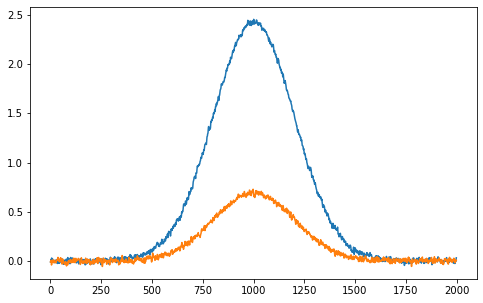

In [59]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(lowpass_open.mean(axis = 0))
ax.plot(lowpass_closed.mean(axis = 0))

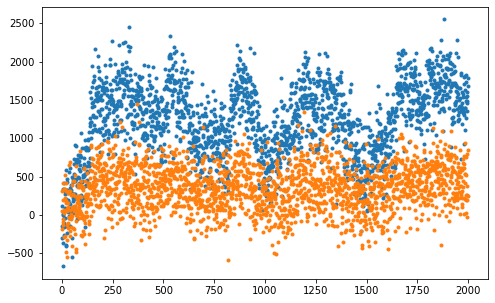

In [60]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(np.trapz(lowpass_open, axis = 1), '.')
ax.plot(np.trapz(lowpass_closed, axis = 1), '.')

3.470 +/- 0.072


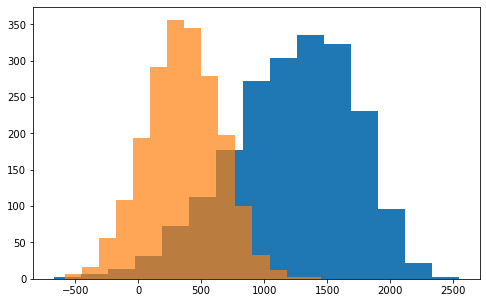

In [61]:
integral_open = np.trapz(lowpass_open, axis = 1)
integral_closed = np.trapz(lowpass_closed, axis = 1)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open, bins = 15)
ax.hist(integral_closed, bins = 15, alpha = 0.7)

r = np.mean(integral_open)/np.mean(integral_closed)
e = np.abs(r)* np.sqrt((np.std(integral_open)/np.sqrt(nr_traces)/np.mean(integral_open))**2+(np.std(integral_closed)/np.sqrt(nr_traces)/np.mean(integral_closed))**2)
print(f'{r:.3f} +/- {e:.3f}')

In [62]:
# taking the std first over all traces and then taking the mean
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt((np.std(lowpass_open, axis = 0).mean()/np.sqrt(nr_traces))**2 * trace_length)
ec = np.sqrt((np.std(lowpass_closed, axis = 0).mean()/np.sqrt(nr_traces))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.470 +/- 0.007


In [63]:
# or only taking the std first over all traces and then taking the mean over the first 250 points
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
eo = np.sqrt((np.std(lowpass_open, axis = 0)[:250].mean()/np.sqrt(nr_traces))**2 * trace_length)
ec = np.sqrt((np.std(lowpass_closed, axis = 0)[:250].mean()/np.sqrt(nr_traces))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.470 +/- 0.007


In [64]:
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt(np.std(lowpass_open.mean(axis = 0))**2 * trace_length)
ec = np.sqrt(np.std(lowpass_closed.mean(axis = 0))**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.470 +/- 0.146


In [65]:
# or only taking the std over the first 250 points
r = np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0))

# integral error propagation, getting the error on each timestep from the std over all traces
# this assumes 
eo = np.sqrt(np.std(lowpass_open.mean(axis = 0)[:250])**2 * trace_length)
ec = np.sqrt(np.std(lowpass_closed.mean(axis = 0)[:250])**2 * trace_length)

e = np.abs(r) * np.sqrt((eo/(np.trapz(lowpass_open.mean(axis = 0))))**2 + (ec/(np.trapz(lowpass_closed.mean(axis = 0))))**2)

print(f'{r:.3f} +/- {e:.3f}')

3.470 +/- 0.008


4.3155797156273

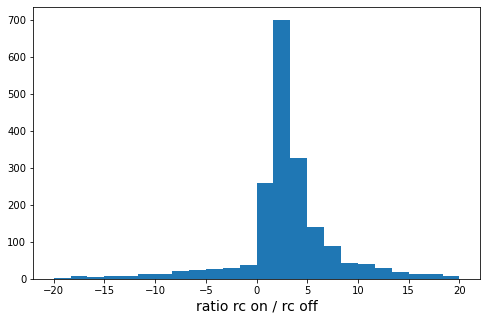

In [66]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(integral_open/integral_closed, bins = np.linspace(-20,20,25))
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
(integral_open/integral_closed).mean()

In [97]:
navg = 100
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

3.735702463944026

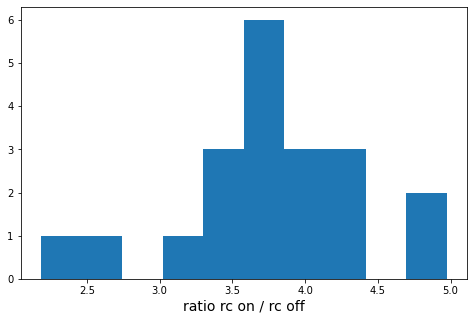

In [98]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

3.735702463944026

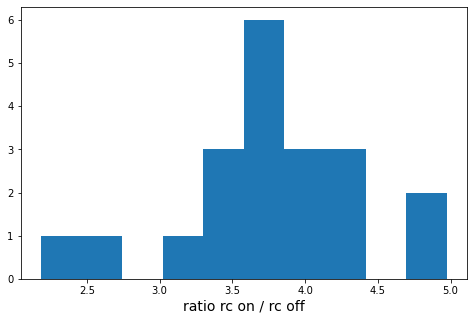

In [99]:
ratios_mask = ratios >= 0
ratios = ratios[ratios_mask]
ratios_mask = np.abs(np.mean(ratios)-ratios) < 3*np.std(ratios)
ratios = ratios[ratios_mask]
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratios)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
np.mean(ratios)

Weighted average of bunches

In [100]:
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, np.sqrt(variance))

In [104]:
navg = 100
averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)

avg_ints_open = np.trapz(averaged_open, axis = 1)
avg_ints_closed = np.trapz(averaged_closed, axis = 1)

r = avg_ints_open/avg_ints_closed

eo = np.sqrt(np.sum((lowpass_open.reshape(-1,navg,trace_length).std(axis = 1)/np.sqrt(navg))**2, axis = 1))
ec = np.sqrt(np.sum((lowpass_closed.reshape(-1,navg,trace_length).std(axis = 1)/np.sqrt(navg))**2, axis = 1))
e = np.abs(r) * np.sqrt(np.sum( (eo/avg_ints_open)**2 + (ec/avg_ints_closed)**2))

rw, ew = weighted_avg_and_std(r, 1/e**2)
print(f'{rw:.3f} +/- {ew/np.sqrt(len(r)):.3f}')

3.466 +/- 0.159


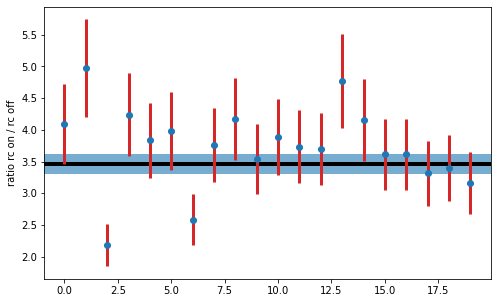

In [105]:
fig, ax = plt.subplots(figsize = (8,5))

ax.errorbar(np.arange(len(averaged_open)), r, yerr = e, fmt = '.', ecolor = 'C3', ms = 12, lw = 3)
ax.axhline(rw, zorder = 0, color = 'k', lw = 4)

import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)
l = rw - ew/np.sqrt(len(r))
u = rw + ew/np.sqrt(len(r))
ax.fill_between(np.arange(len(r)), l * np.ones(len(r)), u*np.ones(len(r)), alpha = 0.6, zorder = 0,
                transform = trans)
ax.set_ylabel('ratio rc on / rc off');

3.735702463944026

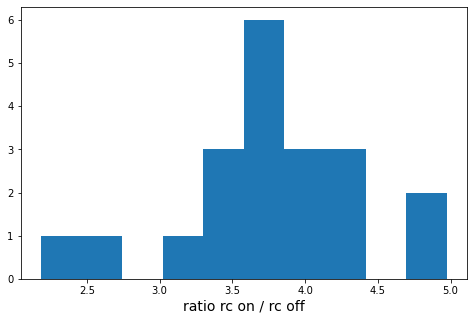

In [106]:
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(avg_ints_open/avg_ints_closed)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ratios = avg_ints_open/avg_ints_closed
np.mean(ratios)

In [73]:
from tqdm import tqdm
navg = 50
nr_traces = 2000
res = []
for _ in tqdm(range(100)):
    sigma = np.sqrt(2)
    amplitude = amp
    x = np.arange(trace_length)

    trace_closed = gaussian(x, 1000, 200)*amplitude
    trace_open = ratio*trace_closed.copy()

    amp_walk = random_walk_bound(0.05, 0, 2, nr_traces*2)
    amp_walk = amp_walk/amp_walk.max()

    do = np.array([trace_open * amp_walk[::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)])
    dc = np.array([trace_closed * amp_walk[1::2][_] + np.random.randn(trace_length)*sigma for _ in range(nr_traces)] )

    lowpass_open = lowpass_data(do, 10e3, 100e3, order = 1) - offset
    lowpass_closed = lowpass_data(dc, 10e3, 100e3, order = 1) - offset
    
    lowpass_open -= np.mean(lowpass_open[:,150:250], axis = 1)[:, np.newaxis]
    lowpass_closed -= np.mean(lowpass_closed[:,150:250], axis = 1)[:, np.newaxis]

    integral_open = np.trapz(lowpass_open, axis = 1)
    integral_closed = np.trapz(lowpass_closed, axis = 1)
    

    averaged_open = lowpass_open.reshape(-1,navg,trace_length).mean(axis = 1)
    averaged_closed = lowpass_closed.reshape(-1,navg,trace_length).mean(axis = 1)
    avg_ints_open = np.trapz(averaged_open, axis = 1)
    avg_ints_closed = np.trapz(averaged_closed, axis = 1)
    ratios = avg_ints_open/avg_ints_closed
    
    res.append((np.trapz(lowpass_open.mean(axis = 0))/np.trapz(lowpass_closed.mean(axis = 0)), 
                np.mean(integral_open)/np.mean(integral_closed),
                np.mean(ratios)))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:46<00:00,  2.15it/s]


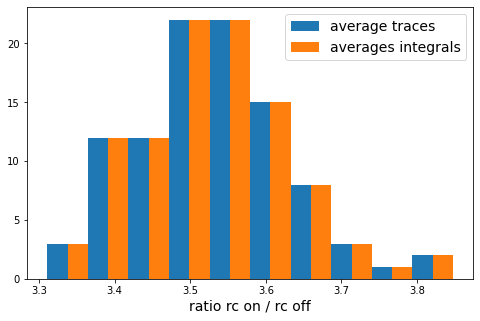

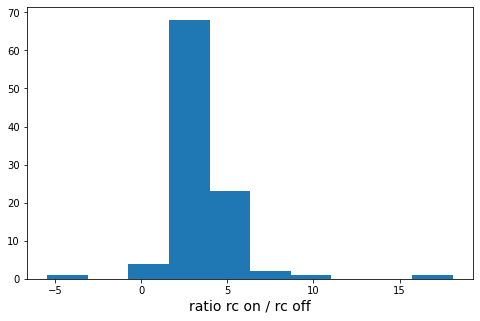

In [74]:
ratio_alltrace, ratio_integralmean, ratio_bunched = zip(*res)
fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_alltrace, rwidth = 0.5, align = 'mid', label = 'average traces')
ax.hist(ratio_integralmean, rwidth = 0.5, align = 'right', label = 'averages integrals')

ax.set_xlabel('ratio rc on / rc off', fontsize = 14)
ax.legend(fontsize = 14)

fig, ax = plt.subplots(figsize = (8,5))
ax.hist(ratio_bunched)
ax.set_xlabel('ratio rc on / rc off', fontsize = 14);

array([ 6.96216003,  4.77515629, 10.54176938, ...,  9.71570669,
       16.82387903, 11.46604042])

In [ ]:
plt.np.random.normal(340000,39490,int(1e5))/np.random.normal(37323, 13453, int(1e5))